In [45]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import argparse
import sys

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from astronet import models
from astronet.data import preprocess
from astronet.util import estimator_util
from tf_util import config_util
from tf_util import configdict

In [56]:
all_time, all_flux = preprocess.read_light_curve(11442793,'astronet/kepler/0114')

D:\exoplanet_ml_master\exoplanet_ml\astronet\data
D:\exoplanet-ml-master\exoplanet-mlstronet\kepler
TESTESTTESTESTTESTESTTESTESTTESTESTTESTESTTESTEST
Base directory: astronet/kepler/0114\011442793
astronet/kepler/0114


In [65]:
time, flux = preprocess.process_light_curve(all_time, all_flux)

In [48]:
len(time)

51503

In [66]:
from light_curve import util
result = util.phase_fold_time(time,flux,2.2)
len(result)

51503

In [67]:
time,flux  =preprocess.phase_fold_and_sort_light_curve(time,flux,14.44912,2.2)

In [20]:
len(time)

51503

In [68]:
features = {}
global_view = preprocess.global_view(time, flux, 14.44912).astype(np.float32)
    # Add a batch dimension.
features["global_view"] = np.expand_dims(global_view, 0)

In [63]:
features["global_view"].shape

(1, 2001)

In [69]:
local_view = preprocess.local_view(time, flux, 14.44912, 0.11267).astype(np.float32)
    # Add a batch dimension.
features["local_view"] = np.expand_dims(local_view, 0)

In [70]:
features["local_view"].shape

(1, 201)

In [41]:
features["local_view"][0]

array([ 0.07591093, -0.05617409, -0.06123482, -0.00506073, -0.04453441,
        0.05465587,  0.10020243,  0.09109312,  0.08299595,  0.08097166,
       -0.2722672 , -0.2722672 , -0.25101215, -0.3340081 , -0.18825911,
       -0.07692308, -0.08856275,  0.02631579, -0.01214575, -0.07338057,
       -0.048583  , -0.12854251, -0.3188259 , -0.32945344, -0.37348178,
       -0.5323887 ,  0.1194332 , -0.06123482,  0.11437247, -0.06123482,
       -0.19888663, -0.13309717, -0.19534414, -0.13765182, -0.00101215,
        0.36133602,  0.3117409 ,  0.14271255,  0.03441295, -0.07135627,
        0.03441295,  0.03846154,  0.05161943, -0.09615385, -0.0354251 ,
        0.23380567,  0.17307693,  0.11234818,  0.11234818,  0.11133603,
        0.09412955,  0.08603239, -0.0840081 , -0.14423077, -0.07287449,
       -0.14220648, -0.13107288,  0.15789473,  0.11639676,  0.24291497,
        0.23279352, -0.09109312, -0.10779352, -0.09109312, -0.04453441,
        0.26619434,  0.17611337,  0.14979757,  0.14979757, -0.27

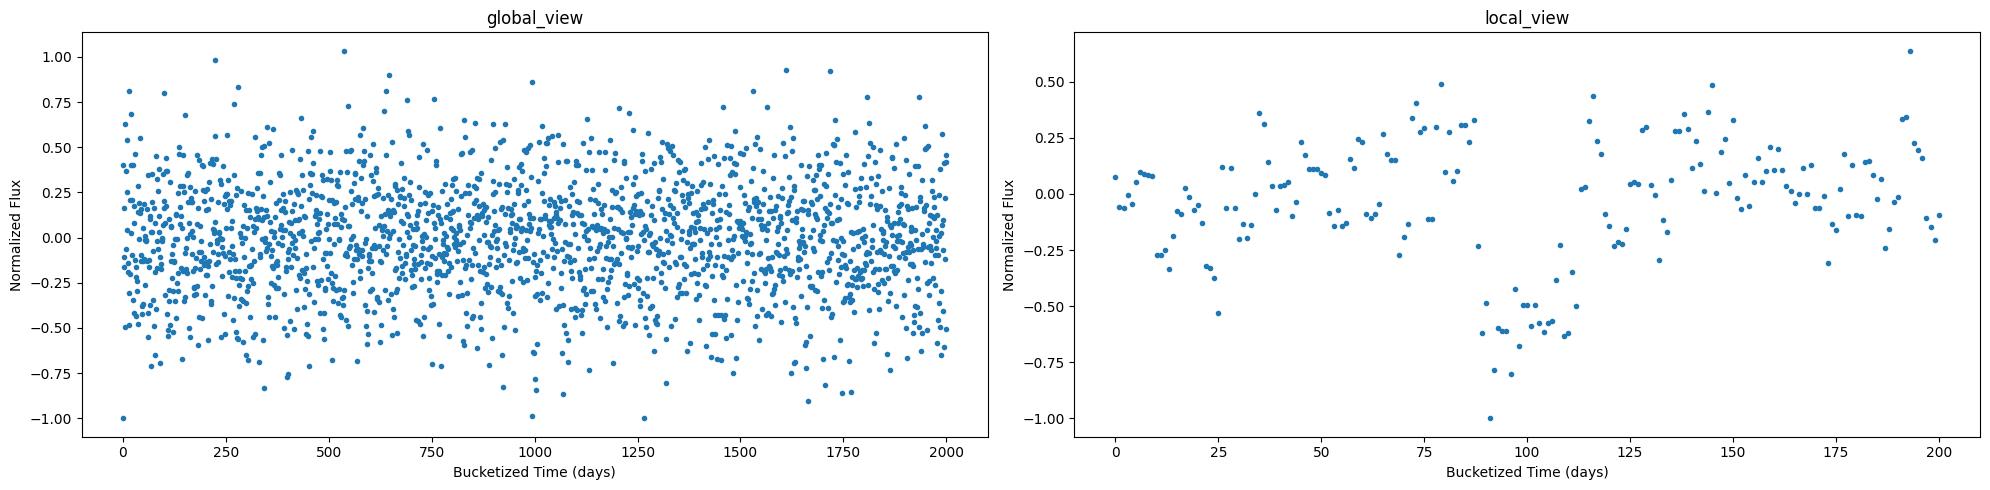

In [71]:

ncols = len(features)
fig, axes = plt.subplots(1, ncols, figsize=(10 * ncols, 5), squeeze=False)

for i, name in enumerate(sorted(features)):
    ax = axes[0][i]
    ax.plot(features[name][0], ".")
    ax.set_title(name)
    ax.set_xlabel("Bucketized Time (days)")
    ax.set_ylabel("Normalized Flux")

fig.tight_layout()

In [ ]:
import numpy as np
import astropy.units as u
from astropy.timeseries import BoxLeastSquares
model = BoxLeastSquares(time,flux)
periodogram = model.autopower(0.2)

In [ ]:
import matplotlib.pyplot as plt                  
plt.plot(periodogram.period, periodogram.power)  

In [21]:
import numpy as np
from astropy.timeseries import LombScargle

def find_transit_parameters(kepler_id, kepler_data_dir):
    # Read light curve data
    filenames = kepler_filenames(kepler_data_dir, kepler_id)
    all_time, all_flux = read_kepler_light_curve(filenames)
    
    time = np.concatenate(all_time)
    flux = np.concatenate(all_flux)
    
    # Normalize flux
    flux /= np.median(flux)
    
    # Create LombScargle object
    ls = LombScargle(time, flux)
    
    # Define frequency range for search
    frequency, power = ls.autopower(normalization='psd')
    
    # Get best-fit parameters
    period = 1 / frequency[np.argmax(power)]
    t0 = time[flux.argmax()]  # Assuming the transit is centered at the peak flux
    duration = 0.1 * period  # Assuming transit duration is 10% of the period
    
    return period, t0, duration

# Example usage
kepler_id = 11442793
kepler_data_dir = 'astronet/kepler/0114'

period, t0, duration = find_transit_parameters(kepler_id, kepler_data_dir)
print("Period:", period)
print("t0:", t0)
print("Duration:", duration)


Base directory: astronet/kepler/0114\011442793
File does not exist: astronet/kepler/0114\011442793\kplr011442793-2009131105131_llc.fits
File does not exist: astronet/kepler/0114\011442793\kplr011442793-2010078095331_llc.fits
File does not exist: astronet/kepler/0114\011442793\kplr011442793-2011073133259_llc.fits
File does not exist: astronet/kepler/0114\011442793\kplr011442793-2012088054726_llc.fits
File does not exist: astronet/kepler/0114\011442793\kplr011442793-2013098041711_llc.fits
Period: 0.020433615004
t0: 364.820845376
Duration: 0.0020433615004


In [25]:
import numpy as np
from astropy.timeseries import BoxLeastSquares
from light_curve.kepler_io import read_kepler_light_curve, kepler_filenames

# Function to find the period, t0, and duration of a transit signal using BLS
def find_transit_parameters(kepler_id, kepler_data_dir):
    # Read light curve data
    filenames = kepler_filenames(kepler_data_dir, kepler_id)
    all_time, all_flux = read_kepler_light_curve(filenames)
    
    time = np.concatenate(all_time)
    flux = np.concatenate(all_flux)
    
    # Normalize flux
    flux /= np.median(flux)
    
    # Create Box Least Squares object
    bls = BoxLeastSquares(time, flux)
    
    # Define parameter ranges for search
    period_grid = np.linspace(0.5, 50, 10000)
    duration_grid = np.linspace(0.01, 0.1, 100)
    
    # Run BLS search
    result = bls.autopower(period_grid)
    
    # Debugging: Print some relevant information
    print("Number of periods:", len(result.period))
    print("Number of transit times:", len(result.transit_time))
    print("Number of durations:", len(result.duration))
    print("Shape of power array:", result.power.shape)
    print("Max power index:", np.argmax(result.power))
    print("Max power value:", np.max(result.power))
    
    # Get best-fit parameters
    best_index = np.argmax(result.power)
    period = period_grid[best_index]
    t0 = result.transit_time[best_index]
    duration = duration_grid[np.argmax(result.power)]
    
    return period, t0, duration

# Example usage
kepler_id = 11442793
kepler_data_dir = 'astronet/kepler/0114'

period, t0, duration = find_transit_parameters(kepler_id, kepler_data_dir)
print("Period:", period)
print("t0:", t0)
print("Duration:", duration)


Base directory: astronet/kepler/0114\011442793
File does not exist: astronet/kepler/0114\011442793\kplr011442793-2009131105131_llc.fits
File does not exist: astronet/kepler/0114\011442793\kplr011442793-2010078095331_llc.fits
File does not exist: astronet/kepler/0114\011442793\kplr011442793-2011073133259_llc.fits
File does not exist: astronet/kepler/0114\011442793\kplr011442793-2012088054726_llc.fits
File does not exist: astronet/kepler/0114\011442793\kplr011442793-2013098041711_llc.fits
Number of periods: 36765
Number of transit times: 36765
Number of durations: 36765
Shape of power array: (36765,)
Max power index: 19516
Max power value: 5.57400706978


IndexError: index 19516 is out of bounds for axis 0 with size 10000

In [26]:
import numpy as np
from astropy.timeseries import BoxLeastSquares
from light_curve.kepler_io import read_kepler_light_curve, kepler_filenames

# Function to find the period, t0, and duration of a transit signal using BLS
def find_transit_parameters(kepler_id, kepler_data_dir):
    # Read light curve data
    filenames = kepler_filenames(kepler_data_dir, kepler_id)
    all_time, all_flux = read_kepler_light_curve(filenames)
    
    time = np.concatenate(all_time)
    flux = np.concatenate(all_flux)
    
    # Normalize flux
    flux /= np.median(flux)
    
    # Create Box Least Squares object
    bls = BoxLeastSquares(time, flux)
    
    # Define parameter ranges for search
    period_grid = np.linspace(0.5, 50, 10000)
    duration_grid = np.linspace(0.01, 0.1, 100)
    
    # Run BLS search
    result = bls.autopower(period_grid)
    
    # Debugging: Print some relevant information
    print("Number of periods:", len(result.period))
    print("Number of transit times:", len(result.transit_time))
    print("Number of durations:", len(result.duration))
    print("Shape of power array:", result.power.shape)
    print("Max power index:", np.argmax(result.power))
    print("Max power value:", np.max(result.power))
    
    # Get best-fit parameters
    best_index = np.argmax(result.power)
    if best_index >= len(period_grid):
        best_index = len(period_grid) - 1
    period = period_grid[best_index]
    t0 = result.transit_time[best_index]
    duration = duration_grid[np.argmax(result.power)]
    
    return period, t0, duration

# Example usage
kepler_id = 11442793
kepler_data_dir = 'astronet/kepler/0114'

period, t0, duration = find_transit_parameters(kepler_id, kepler_data_dir)
print("Period:", period)
print("t0:", t0)
print("Duration:", duration)


Base directory: astronet/kepler/0114\011442793
File does not exist: astronet/kepler/0114\011442793\kplr011442793-2009131105131_llc.fits
File does not exist: astronet/kepler/0114\011442793\kplr011442793-2010078095331_llc.fits
File does not exist: astronet/kepler/0114\011442793\kplr011442793-2011073133259_llc.fits
File does not exist: astronet/kepler/0114\011442793\kplr011442793-2012088054726_llc.fits
File does not exist: astronet/kepler/0114\011442793\kplr011442793-2013098041711_llc.fits
Number of periods: 36765
Number of transit times: 36765
Number of durations: 36765
Shape of power array: (36765,)
Max power index: 19516
Max power value: 5.57400706978


IndexError: index 19516 is out of bounds for axis 0 with size 100

In [27]:
import numpy as np
from astropy.timeseries import BoxLeastSquares
from light_curve.kepler_io import read_kepler_light_curve, kepler_filenames

# Function to find the period, t0, and duration of a transit signal using BLS
def find_transit_parameters(kepler_id, kepler_data_dir):
    # Read light curve data
    filenames = kepler_filenames(kepler_data_dir, kepler_id)
    all_time, all_flux = read_kepler_light_curve(filenames)
    
    time = np.concatenate(all_time)
    flux = np.concatenate(all_flux)
    
    # Normalize flux
    flux /= np.median(flux)
    
    # Create Box Least Squares object
    bls = BoxLeastSquares(time, flux)
    
    # Define parameter ranges for search
    period_grid = np.linspace(0.5, 50, 10000)
    duration_grid = np.linspace(0.01, 0.1, 100)
    
    # Run BLS search
    result = bls.autopower(period_grid)
    
    # Debugging: Print some relevant information
    print("Number of periods:", len(result.period))
    print("Number of transit times:", len(result.transit_time))
    print("Number of durations:", len(result.duration))
    print("Shape of power array:", result.power.shape)
    print("Max power index:", np.argmax(result.power))
    print("Max power value:", np.max(result.power))
    
    # Get best-fit parameters
    best_index = np.argmax(result.power)
    if best_index >= len(period_grid):
        best_index = len(period_grid) - 1
    period = period_grid[best_index]
    t0 = result.transit_time[best_index]
    duration_index = np.argmax(result.power)
    if duration_index >= len(duration_grid):
        duration_index = len(duration_grid) - 1
    duration = duration_grid[duration_index]
    
    return period, t0, duration

# Example usage
kepler_id = 11442793
kepler_data_dir = 'astronet/kepler/0114'

period, t0, duration = find_transit_parameters(kepler_id, kepler_data_dir)
print("Period:", period)
print("t0:", t0)
print("Duration:", duration)


Base directory: astronet/kepler/0114\011442793
File does not exist: astronet/kepler/0114\011442793\kplr011442793-2009131105131_llc.fits
File does not exist: astronet/kepler/0114\011442793\kplr011442793-2010078095331_llc.fits
File does not exist: astronet/kepler/0114\011442793\kplr011442793-2011073133259_llc.fits
File does not exist: astronet/kepler/0114\011442793\kplr011442793-2012088054726_llc.fits
File does not exist: astronet/kepler/0114\011442793\kplr011442793-2013098041711_llc.fits
Number of periods: 36765
Number of transit times: 36765
Number of durations: 36765
Shape of power array: (36765,)
Max power index: 19516
Max power value: 5.57400706978
Period: 50.0
t0: 148.262439459
Duration: 0.1


Base directory: astronet/kepler/0114\011442793


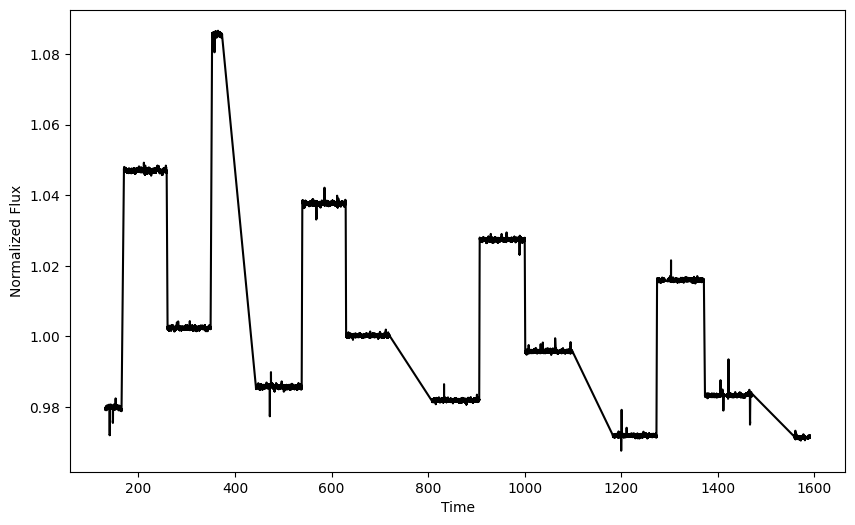

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.timeseries import BoxLeastSquares
from light_curve.kepler_io import read_kepler_light_curve, kepler_filenames

def find_transit_parameters(kepler_id, kepler_data_dir, threshold=0.5):
    # Read light curve data
    filenames = kepler_filenames(kepler_data_dir, kepler_id)
    all_time, all_flux = read_kepler_light_curve(filenames)
    
    time = np.concatenate(all_time)
    flux = np.concatenate(all_flux)
    
    # Normalize flux
    flux /= np.median(flux)
    
    # Create Box Least Squares object
    bls = BoxLeastSquares(time, flux)
    
    # Define parameter ranges for search
    period_grid = np.linspace(0.5, 50, 10000)
    duration_grid = np.linspace(0.01, 0.1, 100)
    
    # Run BLS search
    result = bls.autopower(period_grid)
    
    # Find indices of significant transits
    transit_indices = np.where(result.power > threshold)[0]
    
    # Initialize lists to store transit parameters
    periods = []
    t0s = []
    durations = []
    
    # Iterate over significant transit indices
    for index in transit_indices:
        if index < len(period_grid):  # Ensure index is within bounds
            period = period_grid[index]
            t0 = result.transit_time[index]
            duration_index = np.argmax(result.power)
            if duration_index < len(duration_grid):  # Ensure index is within bounds
                duration = duration_grid[duration_index]
                periods.append(period)
                t0s.append(t0)
                durations.append(duration)
    
    return periods, t0s, durations, time, flux

def plot_light_curve_with_transits(time, flux, periods, t0s, durations):
    plt.figure(figsize=(10, 6))
    plt.plot(time, flux, color='k')
    plt.xlabel('Time')
    plt.ylabel('Normalized Flux')
    
    # Highlight detected transits
    for period, t0, duration in zip(periods, t0s, durations):
        transit_mask = np.abs((time - t0 + 0.5 * period) % period - 0.5 * period) < 0.5 * duration
        plt.fill_between(time, flux, where=transit_mask, color='r', alpha=0.3)
    
        # Print parameters for each transit
        print("Period:", period)
        print("t0:", t0)
        print("Duration:", duration)
    
    plt.show()

# Example usage
kepler_id = 11442793
kepler_data_dir = 'astronet/kepler/0114'

# Find transit parameters
periods, t0s, durations, time, flux = find_transit_parameters(kepler_id, kepler_data_dir)

# Plot the light curve with highlighted transits
plot_light_curve_with_transits(time, flux, periods, t0s, durations)


In [16]:
len(flux)

51503

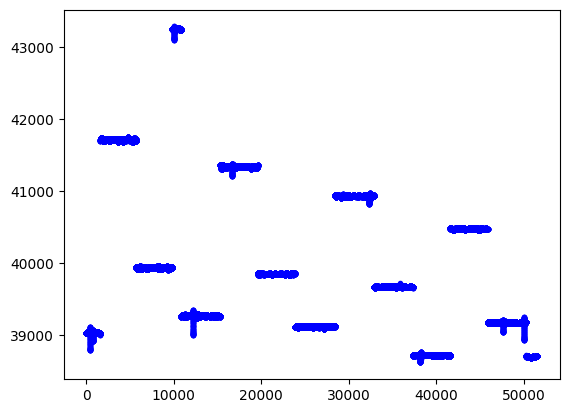

In [30]:
import numpy as np

# File path
file_path = "spline_values.txt"

# Load the data from the text file
data = np.loadtxt(file_path)

# Print the data
plt.plot(data,color='b',marker='o', markersize=3,linestyle='')


{'Mean Flux': 9969.236, 'Median Flux': 9991.199, 'Standard Deviation': 81.56476, 'Minimum Flux': 9669.84, 'Maximum Flux': 10235.69, 'Range': 565.8506, '25th Percentile': 9891.578369140625, '50th Percentile': 9991.19970703125, '75th Percentile': 10033.66064453125, 'Skewness': -0.26791586161526837, 'Kurtosis': -1.1151588958868046}


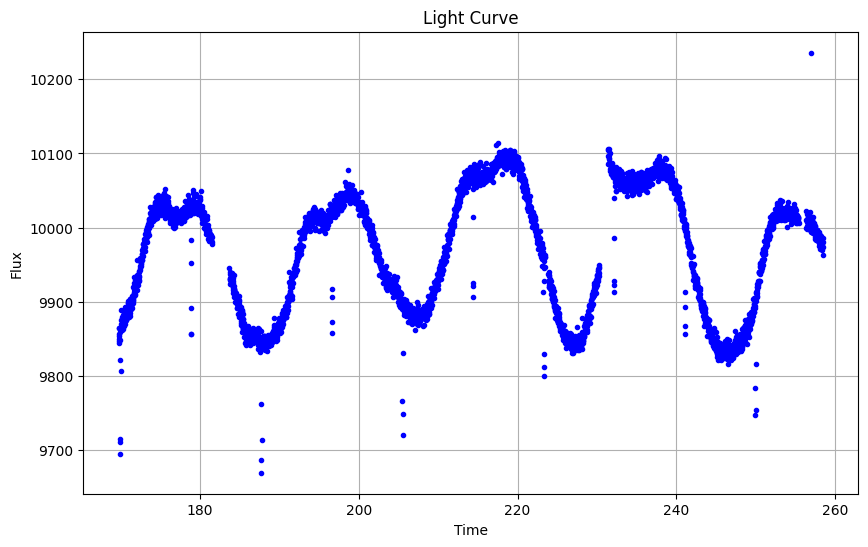

In [1]:
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
from scipy.stats import skew, kurtosis

# Open FITS file   
hdul = fits.open('astronet/kepler/0007/000757450/kplr000757450-2009259160929_llc.fits')

# Get data
data = hdul[1].data

# Extract time and flux
time = data['TIME']
flux = data['PDCSAP_FLUX']  # Use PDCSAP flux for calibrated data

statistics = {}
statistics['Mean Flux'] = np.nanmean(flux)
statistics['Median Flux'] = np.nanmedian(flux)
statistics['Standard Deviation'] = np.nanstd(flux)
statistics['Minimum Flux'] = np.nanmin(flux)
statistics['Maximum Flux'] = np.nanmax(flux)
statistics['Range'] = np.nanmax(flux) - np.nanmin(flux)
percentiles = [25, 50, 75]
for percentile in percentiles:
    statistics[f'{percentile}th Percentile'] = np.nanpercentile(flux, percentile)
statistics['Skewness'] = skew(flux[~np.isnan(flux)])  # Remove NaN values for skewness calculation
statistics['Kurtosis'] = kurtosis(flux[~np.isnan(flux)])  # Remove NaN values for kurtosis calculation
print(statistics)

# Plot the light curve
plt.figure(figsize=(10, 6))
plt.plot(time, flux, color='b', marker='o', markersize=3, linestyle='')
plt.xlabel('Time')
plt.ylabel('Flux')
plt.title('Light Curve')
plt.grid(True)
plt.show()

# Close FITS file
hdul.close()


In [2]:
from astropy.io import fits
import os
import numpy as np

# Directory containing FITS files
directory = 'astronet/kepler/0114/011442793'

# Get list of FITS files
fits_files = [f for f in os.listdir(directory) if f.endswith('.fits')]

# Lists to store max and min flux values for each light curve
max_flux_values = []
min_flux_values = []

# Loop through each FITS file
for fits_file in fits_files:
    # Open FITS file
    hdul = fits.open(os.path.join(directory, fits_file))
    
    # Get data
    data = hdul[1].data
    
    # Extract flux
    flux = data['PDCSAP_FLUX']  # Use PDCSAP flux for calibrated data
    
    # Calculate max and min flux values, excluding NaN values
    max_flux = np.nanmax(flux)
    min_flux = np.nanmin(flux)
    
    # Add max and min flux values to lists
    max_flux_values.append(max_flux)
    min_flux_values.append(min_flux)
    
    # Close FITS file
    hdul.close()

# Filter out NaN values from max and min flux lists
max_flux_values = [value for value in max_flux_values if not np.isnan(value)]
min_flux_values = [value for value in min_flux_values if not np.isnan(value)]

# Calculate max and min flux values for the entire Kepler ID
max_flux_kepler_id = max(max_flux_values)
min_flux_kepler_id = min(min_flux_values)

# Print max and min flux values for the entire Kepler ID
print(f"Maximum Flux Value for Kepler ID: {max_flux_kepler_id}")
print(f"Minimum Flux Value for Kepler ID: {min_flux_kepler_id}")


Maximum Flux Value for Kepler ID: 43295.296875
Minimum Flux Value for Kepler ID: 38554.41015625


54400


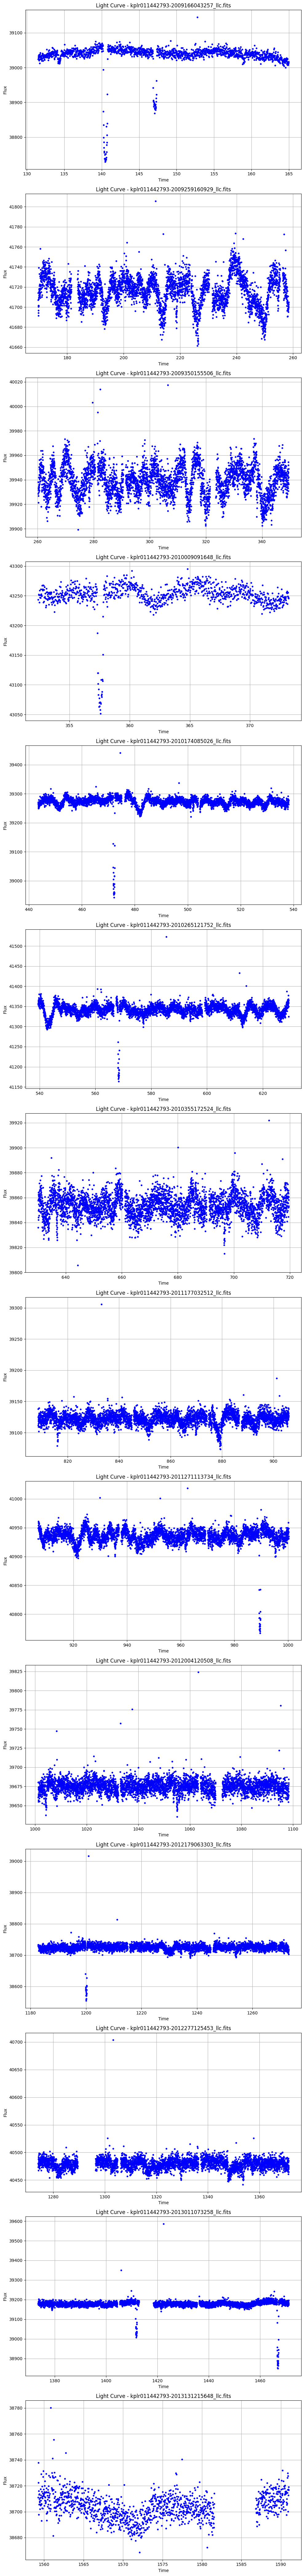

In [44]:
import matplotlib.pyplot as plt
from astropy.io import fits
import os

# Directory containing FITS files
directory = 'astronet/kepler/0114/011442793'

# Get list of FITS files
fits_files = [f for f in os.listdir(directory) if f.endswith('.fits')]

# Create a figure with subplots
fig, axs = plt.subplots(len(fits_files), 1, figsize=(10, 6*len(fits_files)))
l=[]
# Loop through each FITS file
for i, fits_file in enumerate(fits_files):
    # Open FITS file
    hdul = fits.open(os.path.join(directory, fits_file))
    
    # Get data
    data = hdul[1].data
    
    # Extract time and flux
    time = data['TIME']
    flux = data['PDCSAP_FLUX']  # Use PDCSAP flux for calibrated data
    
    # Plot the light curve
    axs[i].plot(time, flux, color='b', marker='o', markersize=3, linestyle='')
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Flux')
    axs[i].set_title('Light Curve - {}'.format(fits_file))
    axs[i].grid(True)
    
    # Close FITS file
    hdul.close()
    l.append(len(time))

print(sum(l))
# Adjust layout
plt.tight_layout()


# Show the plot
plt.show()


FITS files detected:
kplr011442793-2009166043257_llc.fits
kplr011442793-2009259160929_llc.fits
kplr011442793-2009350155506_llc.fits
kplr011442793-2010009091648_llc.fits
kplr011442793-2010174085026_llc.fits
kplr011442793-2010265121752_llc.fits
kplr011442793-2010355172524_llc.fits
kplr011442793-2011177032512_llc.fits
kplr011442793-2011271113734_llc.fits
kplr011442793-2012004120508_llc.fits
kplr011442793-2012179063303_llc.fits
kplr011442793-2012277125453_llc.fits
kplr011442793-2013011073258_llc.fits
kplr011442793-2013131215648_llc.fits
[39024.062 39034.062 39028.047 ... 39012.67  39013.125 39016.6  ]
[      nan       nan       nan ... 41700.027 41704.812 41702.426]
[     nan 39928.74 39938.26 ... 39936.47 39942.2  39948.89]
[      nan 43243.684       nan ... 43247.46  43245.992 43245.754]
[      nan 39265.375 39270.6   ... 39277.777       nan 39278.242]
[     nan 41354.26 41357.87 ... 41349.76      nan 41324.53]
[      nan 39857.58  39835.973 ... 39860.723       nan 39858.07 ]
[      nan 

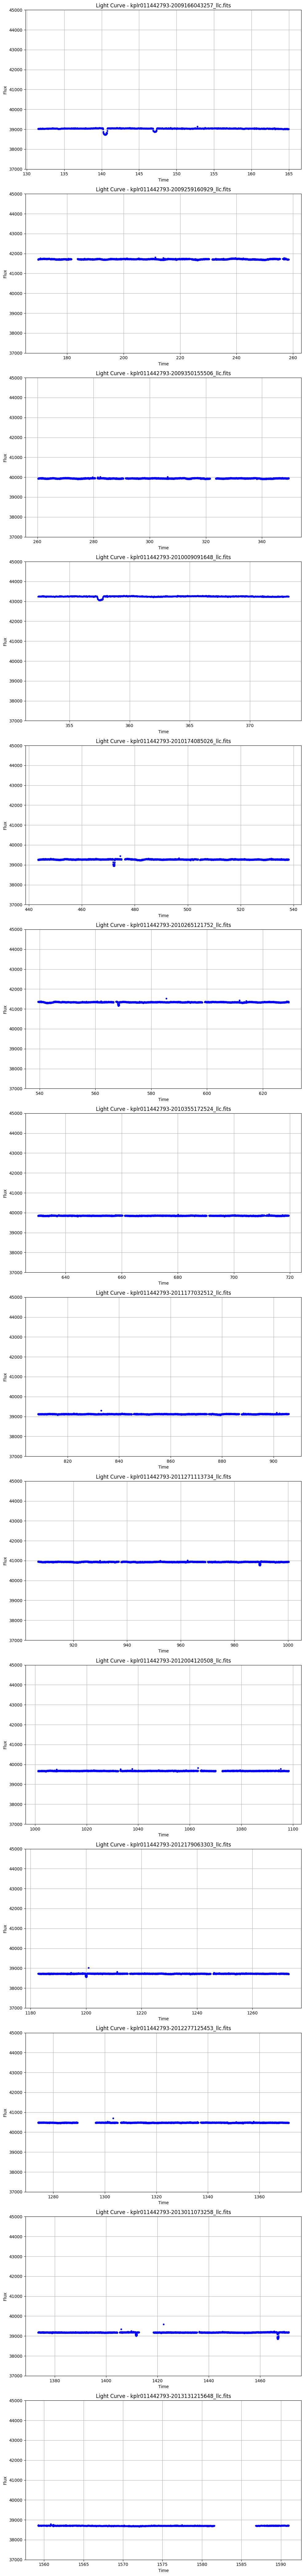

In [20]:
import matplotlib.pyplot as plt
from astropy.io import fits
import os

# Directory containing FITS files
directory = 'astronet/kepler/0114/011442793'

# Get list of FITS files
fits_files = [f for f in os.listdir(directory) if f.endswith('.fits')]

# Print out the list of files for verification
print("FITS files detected:")
for f in fits_files:
    print(f)

# Initialize variables to store overall maximum and minimum flux values
overall_max_flux = float('-inf')
overall_min_flux = float('inf')

# Loop through each FITS file to find overall maximum and minimum flux values
for fits_file in fits_files:
    # Open FITS file
    hdul = fits.open(os.path.join(directory, fits_file))
    
    # Get data
    data = hdul[1].data
    
    # Extract flux
    flux = data['PDCSAP_FLUX']  # Use PDCSAP flux for calibrated data
    
    # Update overall maximum and minimum flux values
    overall_max_flux = max(overall_max_flux, max(flux))
    overall_min_flux = min(overall_min_flux, min(flux))
    
    # Close FITS file
    hdul.close()

# Create a figure with subplots
fig, axs = plt.subplots(len(fits_files), 1, figsize=(10, 6*len(fits_files)))

# Loop through each FITS file
for i, fits_file in enumerate(fits_files):
    # Open FITS file
    hdul = fits.open(os.path.join(directory, fits_file))
    
    # Get data
    data = hdul[1].data
    
    # Extract time and flux
    time = data['TIME']
    flux = data['PDCSAP_FLUX']  # Use PDCSAP flux for calibrated data
    print(flux)
    # Plot the light curve
    axs[i].plot(time, flux, color='b', marker='o', markersize=3, linestyle='')
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Flux')
    axs[i].set_title('Light Curve - {}'.format(fits_file))
    axs[i].grid(True)
    
    # Set y-axis limits to ensure same scale
    axs[i].set_ylim(37000,45000)
    
    # Close FITS file
    hdul.close()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [72]:
from astropy.io import fits

def get_column_names(file_path):
    # Open the FITS file
    with fits.open(file_path) as hdul:
        # Get the header of the first extension (assuming it's a table)
        header = hdul[1].header  # Change the index if necessary
        
        # Extract the column names from the header
        column_names = []
        for key in header.keys():
            if key.startswith('TTYPE'):
                column_names.append(header[key])
        
        return column_names

# Example usage
file_path = 'astronet/kepler/0114/011442793/kplr011442793-2010009091648_llc.fits'
column_names = get_column_names(file_path)
print("Column names:", column_names)


Column names: ['TIME', 'TIMECORR', 'CADENCENO', 'SAP_FLUX', 'SAP_FLUX_ERR', 'SAP_BKG', 'SAP_BKG_ERR', 'PDCSAP_FLUX', 'PDCSAP_FLUX_ERR', 'SAP_QUALITY', 'PSF_CENTR1', 'PSF_CENTR1_ERR', 'PSF_CENTR2', 'PSF_CENTR2_ERR', 'MOM_CENTR1', 'MOM_CENTR1_ERR', 'MOM_CENTR2', 'MOM_CENTR2_ERR', 'POS_CORR1', 'POS_CORR2']


In [9]:
import pandas as pd
import os

# Load your data into a DataFrame (replace 'astronet/q1_q17_dr24_tce_2024.01.31_08.25.53.csv' with your actual file path)
df = pd.read_csv('astronet/q1_q17_dr24_tce_2024.01.31_08.25.53.csv')

# Filter rows with 'PC' or 'AFP' in the 'av_training_set' column
filtered_df = df[df['av_training_set'].isin(['PC', 'AFP'])]

# Initialize an empty DataFrame to store the filtered results
result_df = pd.DataFrame(columns=df.columns)

# Counter for PC and AFP Kepler IDs
pc_count, afp_count = 0, 0

# Iterate over each row in the filtered DataFrame
for index, row in filtered_df.iterrows():
    # Extract Kepler ID and pad it with zeros to make its total length 9
    kepler_id = str(row['kepid']).zfill(9)
    # Extract the first 4 digits of the Kepler ID
    folder_name = kepler_id[:4]
    # Construct the path to the folder
    folder_path = os.path.join('astronet/kepler', folder_name, kepler_id)
    # Check if the folder exists
    if os.path.exists(folder_path):
        # Check if the row has 'PC' in 'av_training_set' and the PC count is less than 5
        if row['av_training_set'] == 'PC' and pc_count < 5:
            # Add the row details to the result DataFrame
            result_df = result_df.append(row, ignore_index=True)
            pc_count += 1
        # Check if the row has 'AFP' in 'av_training_set' and the AFP count is less than 5
        elif row['av_training_set'] == 'AFP' and afp_count < 5:
            # Add the row details to the result DataFrame
            result_df = result_df.append(row, ignore_index=True)
            afp_count += 1
        # Check if both PC and AFP counts reach 5
        if pc_count == 5 and afp_count == 5:
            break

# Save the result to a new CSV file named 'filtered_data.csv'
result_df.to_csv('filtered_data.csv', index=False)

# Display the result DataFrame
print(result_df)


  rowid    kepid tce_plnt_num  tce_rogue_flag  tce_period  tce_period_err  \
0     1  1162345            2             NaN    0.831850        0.000067   
1     4  1162345            3             NaN    0.831833        0.000009   
2     6   757450            1             NaN    8.884920        0.000001   
3     8   892772            1             NaN    5.092600        0.000031   
4    14  1026957            1             NaN   21.761300        0.000010   
5    15  1160891            1             NaN    0.940463        0.000026   
6    20  1161345            1             NaN    4.287580        0.000001   
7    34  2019477            1             NaN   27.248100        0.000485   
8    44  2439243            1             NaN   26.020400        0.000165   
9    66  2854698            1             NaN    8.187360        0.000013   

   tce_time0bk  tce_time0bk_err  tce_impact  tce_impact_err  ...  tce_eqt_err  \
0      132.227         0.035200     0.92600           1.470  ...       

In [6]:
filtered_df

,rowid,kepid,tce_plnt_num,tce_rogue_flag,tce_period,tce_period_err,tce_time0bk,tce_time0bk_err,tce_impact,tce_impact_err,...,tce_eqt_err,tce_insol,tce_insol_err,tce_steff,tce_steff_err,tce_slogg,tce_slogg_err,tce_sradius,tce_sradius_err,av_training_set
0,1,1162345,2,NaN,0.831850,6.690000e-05,132.227,0.035200,0.9260,1.47000,...,637.0,NaN,NaN,6510,207,4.07,0.26,1.728,0.791,AFP
3,4,1162345,3,NaN,0.831833,9.430000e-06,131.919,0.002210,0.0954,51.80000,...,637.0,NaN,NaN,6510,207,4.07,0.26,1.728,0.791,AFP
5,6,757450,1,NaN,8.884920,1.190000e-06,134.452,0.000101,0.0568,0.95000,...,27.6,NaN,NaN,5332,102,4.50,0.04,0.843,0.051,PC
7,8,892772,1,NaN,5.092600,3.140000e-05,133.451,0.004820,0.3000,16.10000,...,78.6,NaN,NaN,5037,197,4.55,0.12,0.751,0.127,AFP
13,14,1026957,1,NaN,21.761300,1.000000e-05,144.779,0.000385,0.3180,1.36000,...,20.7,NaN,NaN,4859,105,4.61,0.06,0.723,0.053,AFP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20361,20362,11905761,2,NaN,3.580330,6.530000e-05,133.312,0.012900,0.0826,68.70000,...,406.0,NaN,NaN,6745,308,3.93,0.24,2.346,0.954,AFP
20363,20364,11908559,1,NaN,0.716006,1.240000e-05,132.019,0.002550,0.7000,0.62600,...,774.0,NaN,NaN,7224,309,3.89,0.24,2.508,1.039,AFP
20364,20365,11923562,2,NaN,0.739472,1.070000e-05,131.618,0.001400,0.2850,6.83000,...,997.0,NaN,NaN,7191,318,4.23,0.38,1.473,1.005,AFP
20365,20366,11923819,1,NaN,33.159500,9.530000e-07,159.812,0.000023,0.7470,0.01980,...,200.0,NaN,NaN,7968,323,3.95,0.23,2.390,0.854,AFP


File: kplr011442793-2009166043257_llc.fits, Time shape: (1639,), Flux shape: (1639,)
Median flux: nan
Normalized flux: [nan nan nan ... nan nan nan]
File: kplr011442793-2009259160929_llc.fits, Time shape: (4354,), Flux shape: (4354,)
Median flux: nan
Normalized flux: [nan nan nan ... nan nan nan]
File: kplr011442793-2009350155506_llc.fits, Time shape: (4370,), Flux shape: (4370,)
Median flux: nan
Normalized flux: [nan nan nan ... nan nan nan]
File: kplr011442793-2010009091648_llc.fits, Time shape: (1021,), Flux shape: (1021,)
Median flux: nan
Normalized flux: [nan nan nan ... nan nan nan]
File: kplr011442793-2010174085026_llc.fits, Time shape: (4634,), Flux shape: (4634,)
Median flux: nan
Normalized flux: [nan nan nan ... nan nan nan]
File: kplr011442793-2010265121752_llc.fits, Time shape: (4398,), Flux shape: (4398,)
Median flux: nan
Normalized flux: [nan nan nan ... nan nan nan]
File: kplr011442793-2010355172524_llc.fits, Time shape: (4375,), Flux shape: (4375,)
Median flux: nan
Norm

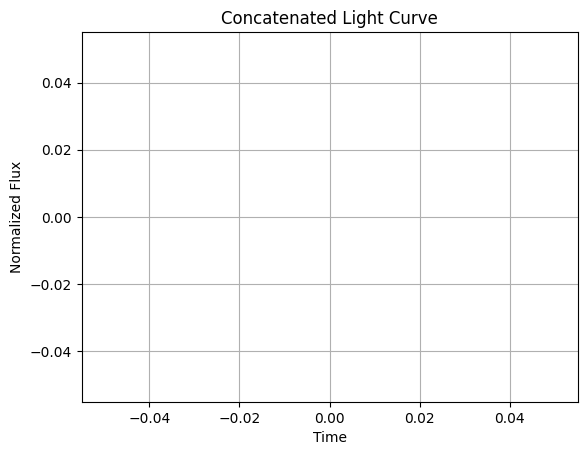

In [20]:
import matplotlib.pyplot as plt
from astropy.io import fits
import os
import numpy as np

# Directory containing FITS files
directory = 'astronet/kepler/0114/011442793'

# Get list of FITS files
fits_files = [f for f in os.listdir(directory) if f.endswith('.fits')]

# Initialize lists to store all time and flux values
all_time = []
all_flux = []

# Loop through each FITS file
for fits_file in fits_files:
    # Open FITS file
    hdul = fits.open(os.path.join(directory, fits_file))
    
    # Get data
    data = hdul[1].data
    
    # Extract time and flux
    time = data['TIME']
    flux = data['PDCSAP_FLUX']  # Use PDCSAP flux for calibrated data
    
    print(f"File: {fits_file}, Time shape: {time.shape}, Flux shape: {flux.shape}")
    
    # Normalize flux by the median
    median_flux = np.median(flux)
    print("Median flux:", median_flux)
    flux /= median_flux
    
    print("Normalized flux:", flux)
    
    # Store time and flux values
    all_time.append(time)
    all_flux.append(flux)
    
    # Close FITS file
    hdul.close()

# Concatenate all time and flux values
time = np.concatenate(all_time)
flux = np.concatenate(all_flux)

print("Time shape after concatenation:", time.shape)
print("Flux shape after concatenation:", flux.shape)

# Plot the concatenated time and flux values
plt.plot(time, flux, ".")
plt.xlabel('Time')
plt.ylabel('Normalized Flux')
plt.title('Concatenated Light Curve')
plt.grid(True)
plt.show()


In [33]:
from light_curve import kepler_io
import matplotlib.pyplot as plt
import numpy as np

KEPLER_DATA_DIR = "F:/exoplanet_ml_master/exoplanet_ml/astronet/kepler"
KEPLER_ID = 11410915  # Kepler-90.

# Read the light curve.
file_names = kepler_io.kepler_filenames(KEPLER_DATA_DIR, KEPLER_ID)
assert file_names, "Failed to find .fits files in {}".format(KEPLER_DATA_DIR)
all_time, all_flux = kepler_io.read_kepler_light_curve(file_names)
print("Read light curve with {} segments".format(len(all_time)))

# Plot the fourth segment.
plt.plot(all_time[3], all_flux[3], ".")
plt.show()

# Plot all light curve segments. We first divide by the median flux in each
# segment, because the segments are on different scales.
for f in all_flux:
    f /= np.median(f)

Read light curve with 13 segments


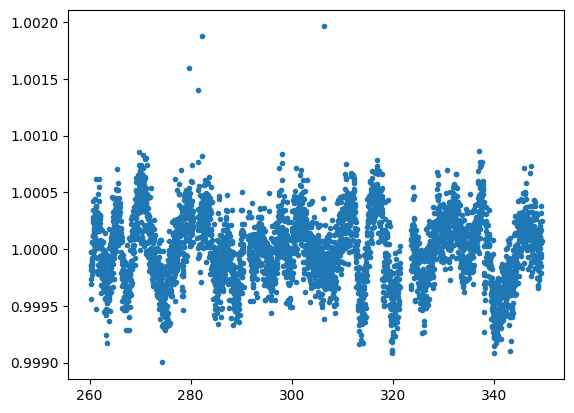

In [31]:
plt.plot(all_time[2], all_flux[2], ".")
plt.show()

<IPython.core.display.Javascript object>


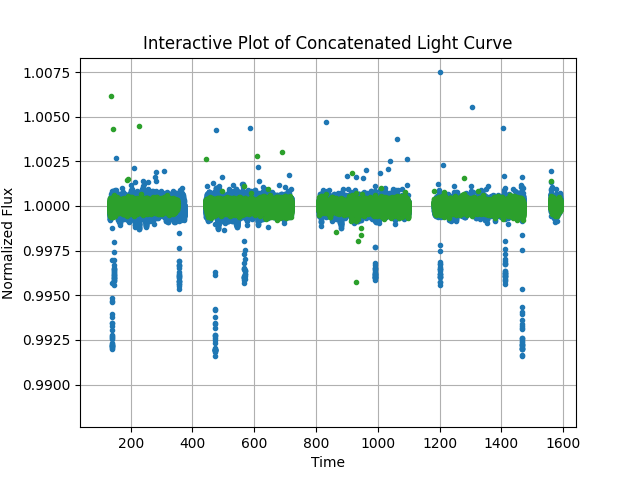

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Normalize flux by the maximum and minimum values
for f in all_flux:
    f = (f - np.min(f)) / (np.max(f) - np.min(f))

# Plot the concatenated time and flux values interactively
%matplotlib notebook

plt.plot(np.concatenate(all_time), np.concatenate(all_flux), ".")
plt.xlabel('Time')
plt.ylabel('Normalized Flux')
plt.title('Interactive Plot of Concatenated Light Curve')
plt.grid(True)
plt.show()


array([1.000166  , 1.0003686 , 1.000188  , ..., 0.99994075, 1.0002325 ,
       1.000066  ], dtype=float32)